In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")

Started


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,

        njobs=1,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        "2022.03.22/*usfa_lstm*/*",
        "2022.03.22/*usfa_farm*/*",
        "2022.03.23/*usfa_farm*/*",
    ],
    config_file='config.json',
)
run_data.load_settings(config_search='config.json')

print(len(run_data.settings_df))
run_data.settings_df.head()

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.22/*usfa_farm*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.23/*usfa_farm*/*
get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.22/*usfa_lstm*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.22/*usfa_farm*/*: 29
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.23/*usfa_farm*/*: 4
/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/refactor/2022.03.22/*usfa_lstm*/*: 8


loaded: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 104538.88it/s]


Added: 41
41


,path,fullpath,experiment_settings,experiment_settings_seed,num_epsilons,cumulant_hidden_size,module_attn_heads,normalize_delta,target_update_period,clip_rewards,...,out_layers,importance_sampling_exponent,replay_table_name,farm_vmap,max_replay_size,state_hidden_size,normalize_task,evaluation_epsilon,module_size,embed_task
0,"2022.03.22/agent=usfa_farmflat_model,setting=l...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.22,agent=usfa_farmflat_model,setting=l...","2022.03.22,agent=usfa_farmflat_model,setting=l...",256,128,0.0,True,2500,False,...,2.0,0.0,priority_table,False,100000,0,False,0.0,128.0,False
1,"2022.03.22/agent=usfa_farmflat_model,setting=l...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.22,agent=usfa_farmflat_model,setting=l...","2022.03.22,agent=usfa_farmflat_model,setting=l...",256,128,0.0,True,2500,False,...,2.0,0.0,priority_table,False,100000,0,False,0.0,128.0,False
2,"2022.03.22/agent=usfa_farmflat_model,setting=l...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.22,agent=usfa_farmflat_model,setting=l...","2022.03.22,agent=usfa_farmflat_model,setting=l...",256,128,0.0,True,2500,False,...,2.0,0.0,priority_table,False,100000,0,False,0.0,128.0,False
3,"2022.03.22/agent=usfa_farmflat_model,setting=l...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.22,agent=usfa_farmflat_model,setting=l...","2022.03.22,agent=usfa_farmflat_model,setting=l...",256,128,0.0,True,2500,False,...,2.0,0.0,priority_table,False,100000,0,False,0.0,128.0,False
4,"2022.03.22/agent=usfa_farmflat_model,setting=l...",/mnt/brain5/scratch/wcarvalh/projects/rljax/re...,"2022.03.22,agent=usfa_farmflat_model,setting=l...","2022.03.22,agent=usfa_farmflat_model,setting=l...",256,128,0.0,True,2500,False,...,2.0,0.0,priority_table,False,100000,0,False,0.0,128.0,False


In [5]:
run_data.load_tensorboard(
    njobs=16,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    # load_paths=True,
)

settings: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [02:10<00:00,  3.19s/it]


Keys:
['actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/EvaluatorSteps',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'usfa/ActorSteps',
 'usfa/LearnerSteps',
 'usfa/EvaluatorSteps',
 'usfa/StepsPerSecond',
 'evaluator/LearnerSteps',
 'actor/LearnerSteps']


In [7]:
Vistool?

Init signature:
Vistool(
    tensorboard_data,
    plot_settings=[],
    metadata_stats=['num_seeds'],
    metadata_settings_dict={},
    metadata_settings_list=[],
    filter_key=None,
    filter_column='max',
    key_with_legend=None,
    plot_data_kwargs={},
    common_settings={},
)
Docstring:      <no docstring>
File:           /mnt/brain5/scratch/wcarvalh/projects/rljax/vistools/tensorboard_vistools.py
Type:           type
Subclasses:     PanelTool


In [14]:
key_with_legend = 'evaluator/0.Task/1,1,1,1/EpisodeReturn'
filter_key = '-1,1,0,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=key_with_legend,
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='max',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
    metadata_settings_list=['agent', 'model_coeff', 'reward_coeff', 'extra_negatives'],
)

,num_seeds,agent,model_coeff,reward_coeff,extra_negatives
0,1,usfa_farmflat_model,0.1,0.0001,4.0
1,1,usfa_lstm,NaN,0.0010,NaN


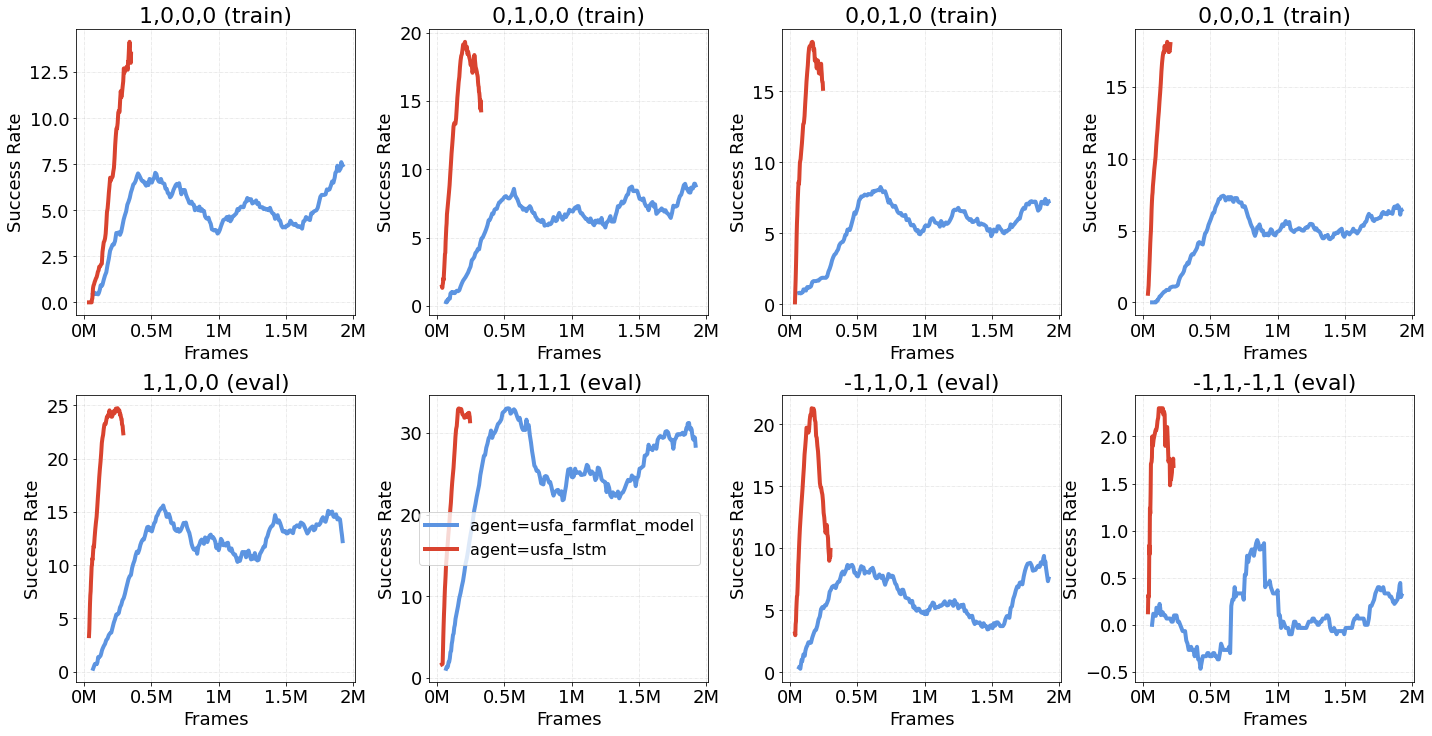

In [41]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=4,
    data_filter_space=dict(
        agent=None,
    ),
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          xmax=2e6,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': 0.0, 'model_coeff': 0.1, 'reward_coeff': 0.0001}
No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': 10.0, 'model_coeff': 0.1, 'reward_coeff': 0.0001}
No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': nan, 'model_coeff': 0.1, 'reward_coeff': 0.0001}


,num_seeds,agent,model_coeff,reward_coeff,extra_negatives
0,1,usfa_farmflat_model,0.1,0.0001,1.0
1,1,usfa_farmflat_model,0.1,0.0001,4.0


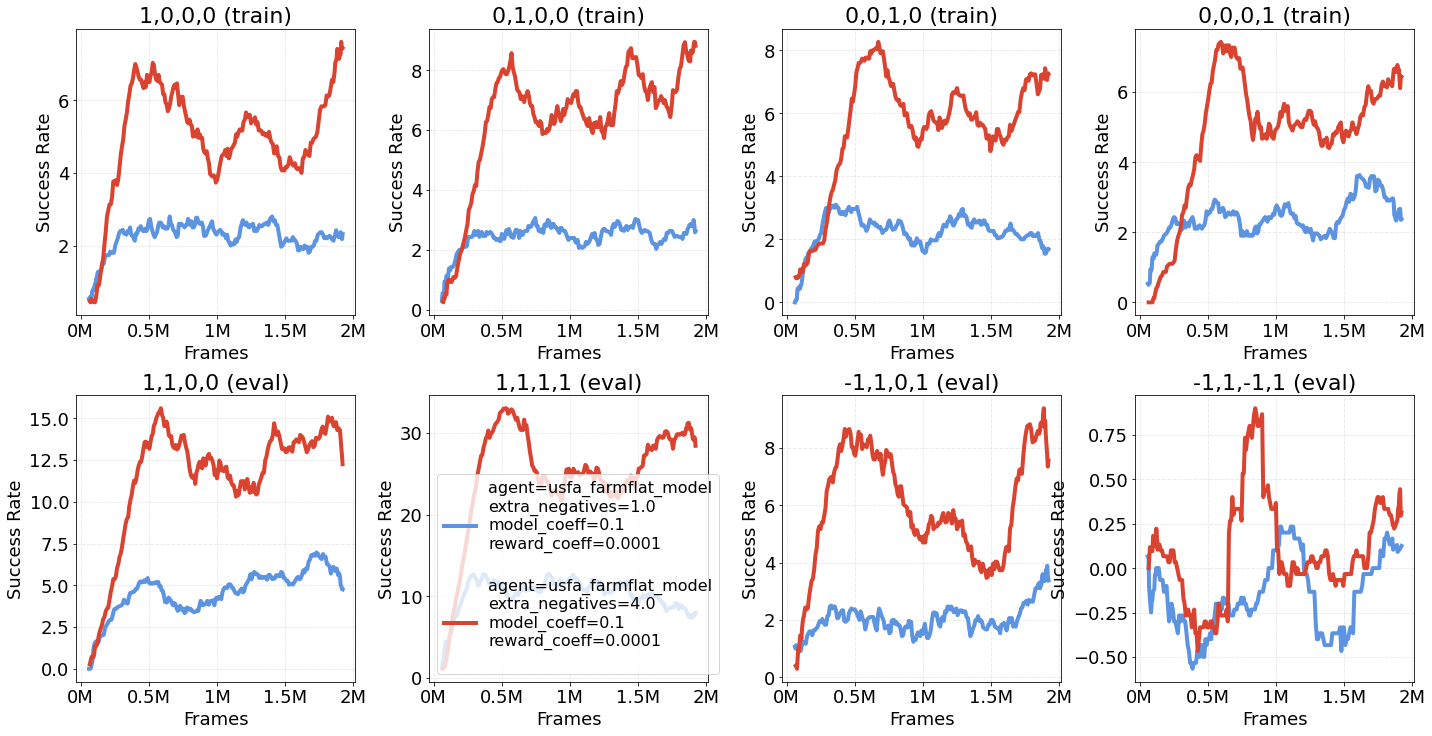

In [42]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=4,
    data_filters = [
        # dict(agent='usfa_lstm'),
        dict(
            agent='usfa_farmflat_model',
            model_coeff=.1,
            reward_coeff=1e-4,
            extra_negatives=None,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          xmax=2e6,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': nan}


,num_seeds,agent,model_coeff,reward_coeff,extra_negatives
0,1,usfa_farmflat_model,0.001,0.0010,0.0
1,1,usfa_farmflat_model,0.100,0.0001,1.0
2,1,usfa_farmflat_model,0.100,0.0010,10.0
3,1,usfa_farmflat_model,0.100,0.0001,4.0


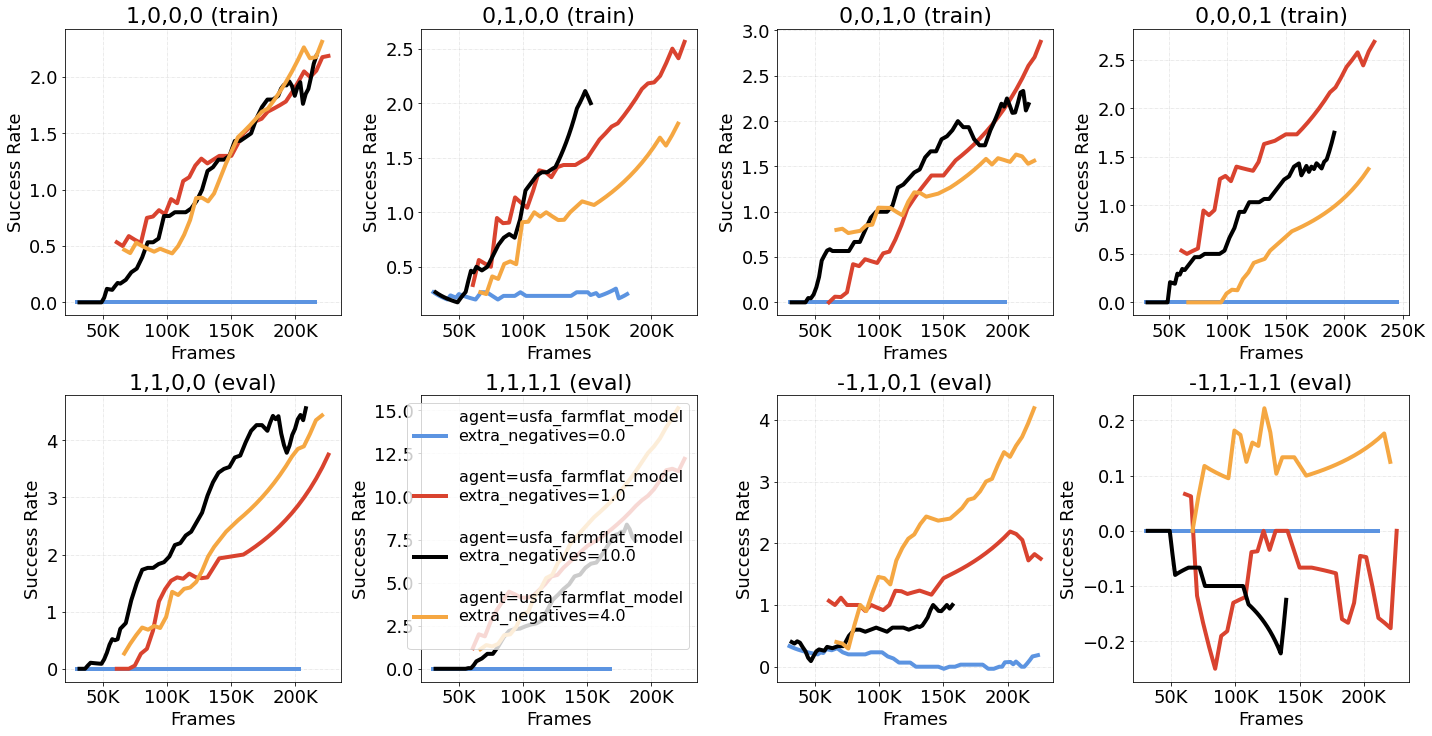

In [38]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=4,

    data_filters = [
        dict(
            agent='usfa_farmflat_model',
            extra_negatives=None,
        ),
    ],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          xmax=300e3,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

No Matches for {'agent': 'usfa_farmflat_model', 'model_coeff': nan}


,num_seeds,model_coeff,extra_negatives
0,1,0.001,4.0
1,1,0.010,4.0
2,1,0.100,4.0
3,1,10.000,1.0
4,1,1.000,4.0


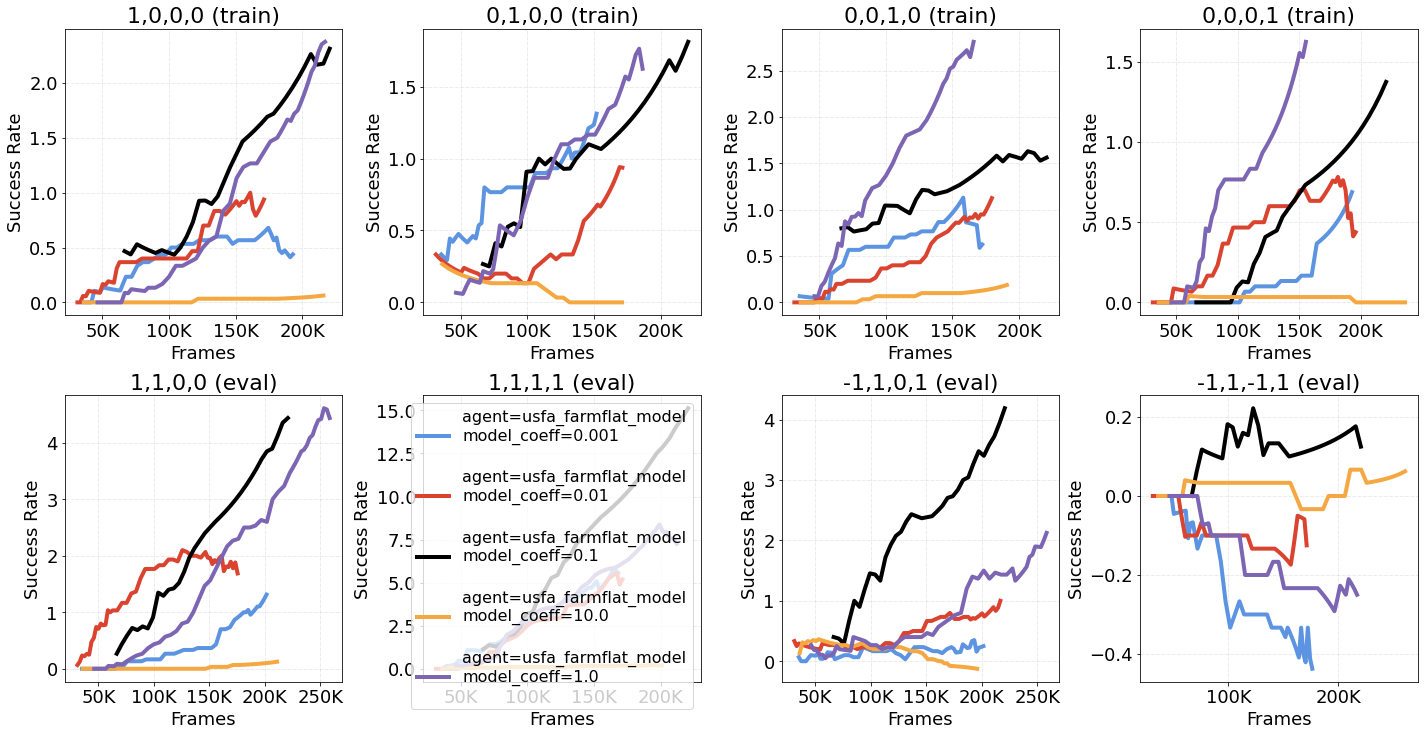

In [40]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=4,
    data_filter_space=dict(
        agent=['usfa_farmflat_model'],
        model_coeff=None,
    ),
    display_settings=['model_coeff', 'extra_negatives'],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          xmax=300e3,
                          rolling=30,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)

No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': 4, 'model_coeff': nan}
No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': 10, 'model_coeff': nan}
No Matches for {'agent': 'usfa_farmflat_model', 'extra_negatives': 10, 'model_coeff': 0.001}


,num_seeds,model_coeff
0,1,0.001
1,1,0.010
2,1,0.100
3,1,0.010
4,1,0.100


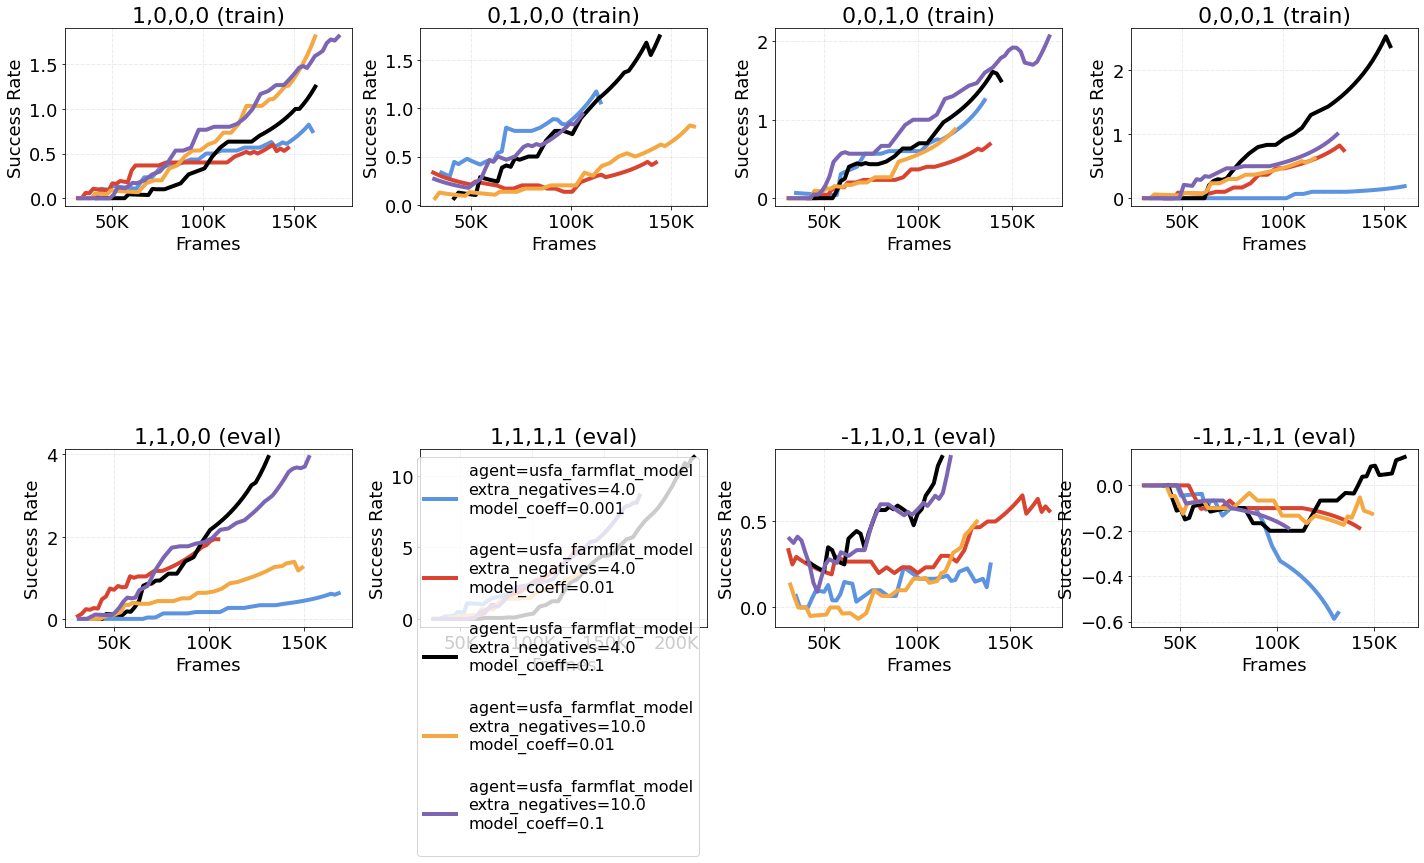

In [23]:
# display(HTML(f"<h1>L2 vs. binary</h1>"))        


vis_tool.plot_filters(
    topk=1,
    maxcols=4,
    # legend_kwargs=dict(
    #             loc='lower left',
    #             bbox_to_anchor=(0,-.5), 
    #             ncol=6,
    #             ),
    data_filter_space=dict(
        agent=['usfa_farmflat_model'],
        extra_negatives=[4, 10],
        model_coeff=None,
    ),
    display_settings=['model_coeff'],
    plot_data_kwargs=dict(xlabel_key='evaluator/ActorSteps',
                          # n_samples=50,
                          rolling=30,
                          std_alpha=.1,
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)